# Introduction to Deep Learning


**What the session is about:**
1. Give an introduction to DL / ANN to get you started with them.
2. Won't be focussing on maths behind it!
3. Focus more on the coding aspect of it.

**What do we expect:**
1. Go back and try to run this notebook by yourself.
2. Play with this notebook --- tweak things here and there.
3. Get acquainted with the syntax and libraries.
4. See a little bit of theory to get better understanding.


### Building block:- Perceptron

- Computation unit. **Input --> Computation --> Output**
- Weights are the learnable parameters.
- Weights determine importance of input signal in the output signal.

<img src="perceptron.png" alt="drawing" width="500"/>

### ANN

- Stacking a bunch of perceptrons.
- Input Layer, Hidden Layer, Output Layer
- Hidden Layer --- Extracted features.

<img src="ann.png" alt="drawing" width="300"/>

### DNN

- ANN with lots of hidden layers.

<img src="deep_nn.jpg" alt="drawing" width="600"/>

1. Image of George Washington given as input.
2. Hidden layers extract relevant info from input (features).
3. Output layers classifies who the person is.

## Fun part --- Coding !!

**Steps in the whole pipeline:**
1. Load and explore the data.
2. Data Preprocessing
3. Build model
4. Analyze model and Build it again! (Tweak the hyperparameters to get the best model.)
5. Again build the model! (Repeat until you get the best model.)
6. Make predictions

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Init Plugin
Init Graph Optimizer
Init Kernel
2.5.0


### Fashion MNIST

- A dataset containing images of clothing items.
- Classification task --- 10 classes.


### Data Exploration

In [2]:
## Loading the data
## (It will download the data when running for the first time.)
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
## Overview of dataset.

print("Shape of training data:", train_images.shape)
print("\nNumber of training images:", len(train_labels))
print("\nNumber of testing images", len(test_labels))
print("\nShape of one image:", train_images[0].shape)

Shape of training data: (60000, 28, 28)

Number of training images: 60000

Number of testing images 10000

Shape of one image: (28, 28)


In [5]:
## Number of images in training data for each category.
import pandas as pd
pd.Series(train_labels).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

### Data Preprocessing

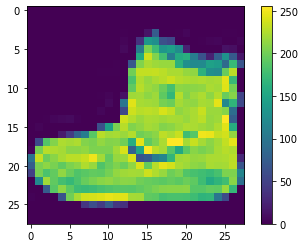

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
## Scaling the values between [0, 1]

## This slightly helps in faster convergence and better accuracy.
## [TODO]:: Try training without this scaling and compare the performance.

train_images = train_images / 255.0
test_images = test_images / 255.0

### Build Model

1. Define the model.
2. Compile it --- specify Loss function, optimizer, evaluation metrics
3. Train the model.

In [8]:
## 1. Defining the model.

model = tf.keras.Sequential([
    ## Flatten the input image from 2D into 1D. (Input Layer)
    ## Input shape based on the dataset image.
    ## All images must be of same shape!!!
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    ## Hidden Layer
    tf.keras.layers.Dense(128, activation='relu'),
    ## Output layer --- size = number of classes = 10
    ## Softmax activation function gives the probability of each class
    tf.keras.layers.Dense(10, activation='softmax')
])

## Activation function is a non linear function which is applied to each layer in the network.

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2021-09-18 23:00:06.839279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-18 23:00:06.839352: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
## 2. Compile the model.

model.compile(optimizer='adam',  # Optimizer --- an algorithm which tries to learn weights of the network.
              # Loss --- measures the error in prediction.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # Metric --- calculates how good the model is performing.
              metrics=['accuracy'])

In [10]:
## 3. Training the model.

## Epochs is the number of passes the model takes over the dataset.
## History object stores all the information about the model
history = model.fit(train_images, train_labels, epochs=2)

Epoch 1/2


2021-09-18 23:00:06.930575: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-18 23:00:06.930755: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-09-18 23:00:07.023314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5061 - accuracy: 0.8224
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3791 - accuracy: 0.8636


**The above accuracy is the accuracy on training data which the model has already seen.**

### Analyze Model (Very Very Imp.)

<pre><strong>Key Question to ask:     What to do once a model is trained??</strong></pre>

- Check accuracy / loss or any other metric.
- Check Generalizability of model (performance on test data)
- Bias / Variance Tradeoff

<br>
<br>

Bias = 100 - train_acc

Variance = train_acc - test_acc

|               | Train Acc High         | Train Acc Low                      |
|---------------|------------------------|------------------------------------|
| Test High Acc | Low bias, Low var      | High bias, High var (not possible) |
| Test Low Acc  | Low bias, High var     | High bias, Low var                 |



Ask yourself question:-

1. Is the bias high?
        - Bigger network
        - Train longer (more epochs)
2. Is variance high?
        - Get more data
        - Add regularization
           

dict_keys(['loss', 'accuracy'])


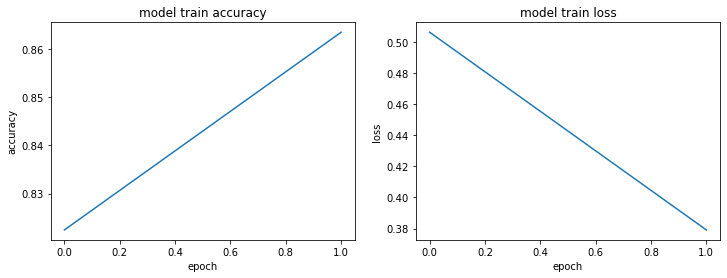

In [11]:
print(history.history.keys())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#  "Accuracy"
axes[0].plot(history.history['accuracy'])
axes[0].set_title('model train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')

# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('model train loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch');

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Better test accuracy => better generalization.
print('\nTest accuracy:', test_acc)

2021-09-18 23:00:20.942100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.4011 - accuracy: 0.8565

Test accuracy: 0.8565000295639038


### Build Model Again

- Deep Learning is an iterative process.
- Try different hyperparameters.
- Analyze the model.

In [13]:
## [TODO]:: Try different values for the following and analyze the model:
##    1. Number of layers
##    2. Number of perceptrons in each layer
##    3. Activation Functions for each layer
##    4. Optimizer
##    5. Loss function


## Some commonly used optimizers:
##   1. Adam
##   2. RMSProp
##   3. SGD (Stochastic Gradient Descent)

## https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

## Some commonly used loss functions:
##   1. Binary Cross Entropy (Binary Classification)
##   2. Categorical Cross Entropy (Multiclass Classification, One hot encoded labels)
##   3. Sparse Categorical Cross Entropy (Multiclass classification, Integer Labels)
##   4. Mean Squared Error (Regression)
##   5. Mean Absolute Error (Regression)

## https://www.tensorflow.org/api_docs/python/tf/keras/losses

## Some commonly used activation functions:
##   1. Relu
##   2. Sigmoid
##   3. Tanh
##   4. Softmax (mostly used for the output layer of classification)

## https://www.tensorflow.org/api_docs/python/tf/keras/activations

### Making Predictions

In [14]:
img = test_images[0]

# Throws error!!
# model.predict(img)
print("Model expects the input to be of shape: ", model.input.shape)
print("Shape of our input: ", img.shape)

# Adding an extra dimension.
img = img[np.newaxis, :, :]
print("Shape of our input after adding another dim: ", img.shape)

# Returns probability of each class
print("\nPredicted probabilities:\n", model.predict(img))

# Returns the predicted class
print("\nPredicted class: ", model.predict(img).argmax(axis=1))

print("Actual class: ", test_labels[0])

Model expects the input to be of shape:  (None, 28, 28)
Shape of our input:  (28, 28)
Shape of our input after adding another dim:  (1, 28, 28)

Predicted probabilities:
 [[5.1946077e-05 2.6259754e-06 3.5959460e-05 1.9826541e-05 1.8954875e-05
  1.3932858e-02 2.7215632e-04 9.4237767e-02 5.4873787e-03 8.8594037e-01]]

Predicted class:  [9]
Actual class:  9


2021-09-18 23:00:21.819715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
